In [1]:
pip install scanpy
pip install igraph
pip install leidenalg
pip install anndata
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beta_adata = sc.read_h5ad("beta.h5ad")
alpha_adata = sc.read_h5ad("alpha.h5ad")
delta_adata = sc.read_h5ad("delta.h5ad")

In [3]:
output_h5ad_b = beta_adata.copy()
output_h5ad_a = alpha_adata.copy()
output_h5ad_d = delta_adata.copy()

sc.pp.normalize_total(output_h5ad_b)
sc.pp.normalize_total(output_h5ad_a)
sc.pp.normalize_total(output_h5ad_d)

sc.pp.log1p(output_h5ad_b)
sc.pp.log1p(output_h5ad_a)
sc.pp.log1p(output_h5ad_d)

In [62]:
print(output_h5ad_b.var.columns, output_h5ad_a.var.columns, output_h5ad_d.var.columns)

Index(['vst.mean', 'vst.variance', 'vst.variance.expected',
       'vst.variance.standardized', 'vst.variable', 'feature_is_filtered',
       'feature_name', 'feature_reference', 'feature_biotype',
       'feature_length', 'feature_type'],
      dtype='object') Index(['vst.mean', 'vst.variance', 'vst.variance.expected',
       'vst.variance.standardized', 'vst.variable', 'feature_is_filtered',
       'feature_name', 'feature_reference', 'feature_biotype',
       'feature_length', 'feature_type'],
      dtype='object') Index(['vst.mean', 'vst.variance', 'vst.variance.expected',
       'vst.variance.standardized', 'vst.variable', 'feature_is_filtered',
       'feature_name', 'feature_reference', 'feature_biotype',
       'feature_length', 'feature_type'],
      dtype='object')


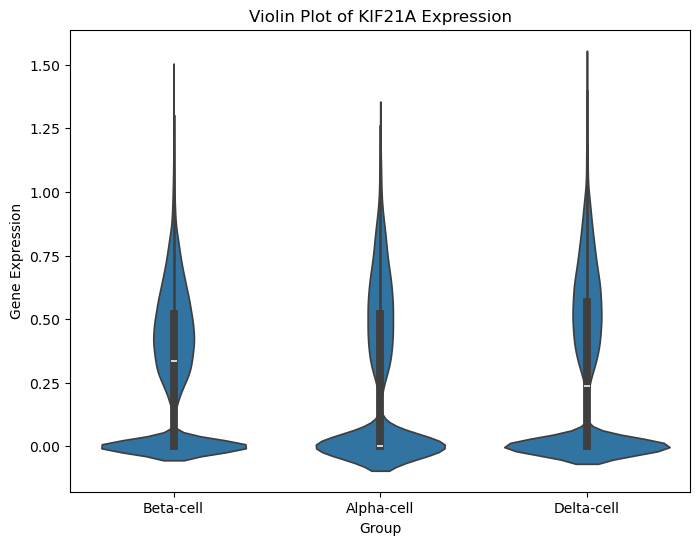

In [63]:
gene_name = 'KIF21A'

beta_expr = output_h5ad_b[:, output_h5ad_b.var.feature_name == gene_name].X.toarray().flatten()
alpha_expr = output_h5ad_a[:, output_h5ad_a.var.feature_name == gene_name].X.toarray().flatten()
delta_expr = output_h5ad_d[:, output_h5ad_d.var.feature_name == gene_name].X.toarray().flatten()


# Create DataFrame
df = pd.DataFrame({
    'KIF21A': np.concatenate([beta_expr, alpha_expr, delta_expr]),
    'Group': ['Beta-cell'] * len(beta_expr) + ['Alpha-cell'] * len(alpha_expr) + ['Delta-cell'] * len(delta_expr)
})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='KIF21A', data=df)
plt.title(f'Violin Plot of KIF21A Expression')
plt.ylabel('Gene Expression')
plt.show()

In [64]:
alpha_non_zero_list = list(filter(lambda x: x != 0, alpha_expr))
delta_non_zero_list = list(filter(lambda x: x != 0, delta_expr))

df = pd.DataFrame(alpha_non_zero_list, columns=['KIF21A expression'])
df.to_csv('alphaCell.csv', index=False)

df = pd.DataFrame(delta_non_zero_list, columns=['KIF21A expression'])
df.to_csv('deltaCell.csv', index=False)


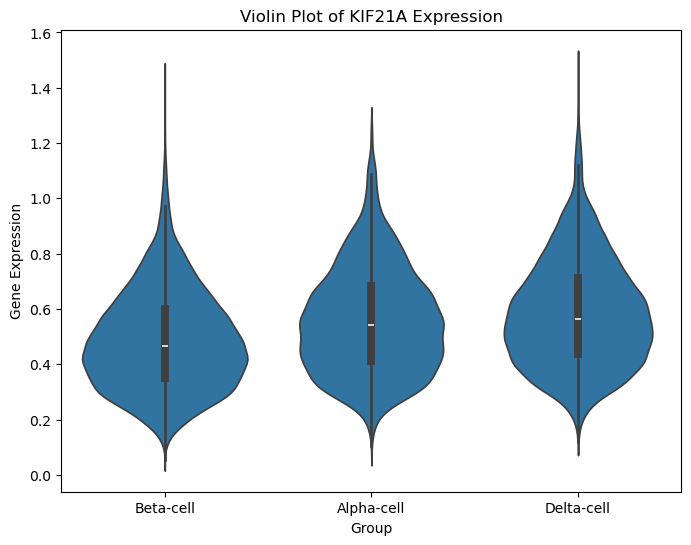

In [65]:
gene_name = 'KIF21A'

beta_expr = output_h5ad_b[:, output_h5ad_b.var.feature_name == gene_name].X.toarray().flatten()
alpha_expr = output_h5ad_a[:, output_h5ad_a.var.feature_name == gene_name].X.toarray().flatten()
delta_expr = output_h5ad_d[:, output_h5ad_d.var.feature_name == gene_name].X.toarray().flatten()

beta_expr = list(filter(lambda x: x != 0, beta_expr))
alpha_expr = list(filter(lambda x: x != 0, alpha_expr))
delta_expr = list(filter(lambda x: x != 0, delta_expr))

# Create DataFrame
df = pd.DataFrame({
    'KIF21A': np.concatenate([beta_expr, alpha_expr, delta_expr]),
    'Group': ['Beta-cell'] * len(beta_expr) + ['Alpha-cell'] * len(alpha_expr) + ['Delta-cell'] * len(delta_expr)
})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='KIF21A', data=df)
plt.title(f'Violin Plot of KIF21A Expression')
plt.ylabel('Gene Expression')
plt.show()

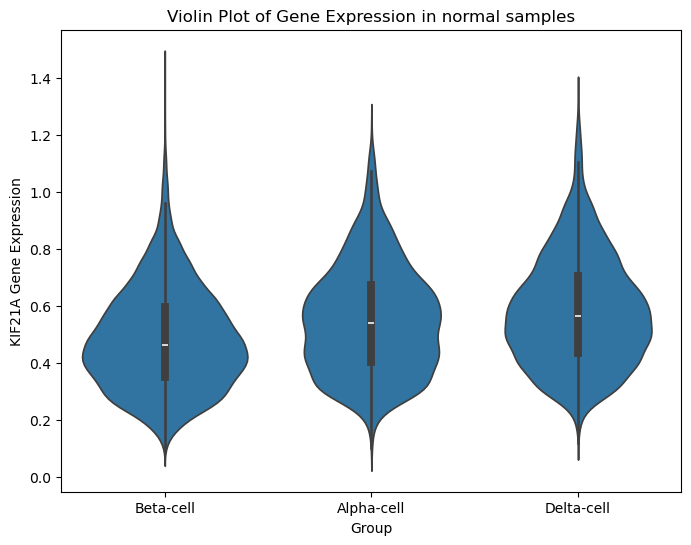

In [4]:
output_h5ad_b = output_h5ad_b[output_h5ad_b.obs.disease == 'normal', :]
output_h5ad_a = output_h5ad_a[output_h5ad_a.obs.disease == 'normal', :]
output_h5ad_d = output_h5ad_d[output_h5ad_d.obs.disease == 'normal', :]

gene_name = 'KIF21A'

beta_expr = output_h5ad_b[:, output_h5ad_b.var.feature_name == gene_name].X.toarray().flatten()
alpha_expr = output_h5ad_a[:, output_h5ad_a.var.feature_name == gene_name].X.toarray().flatten()
delta_expr = output_h5ad_d[:, output_h5ad_d.var.feature_name == gene_name].X.toarray().flatten()

beta_expr = list(filter(lambda x: x != 0, beta_expr))
alpha_expr = list(filter(lambda x: x != 0, alpha_expr))
delta_expr = list(filter(lambda x: x != 0, delta_expr))

# Create DataFrame
df = pd.DataFrame({
    'KIF21A': np.concatenate([beta_expr, alpha_expr, delta_expr]),
    'Group': ['Beta-cell'] * len(beta_expr) + ['Alpha-cell'] * len(alpha_expr) + ['Delta-cell'] * len(delta_expr)
})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='KIF21A', data=df)
plt.title(f'Violin Plot of Gene Expression in normal samples')
plt.ylabel('KIF21A Gene Expression')
plt.show()


In [31]:
gene_expr = output_h5ad[:, output_h5ad.var.feature_name == 'KIF21A'].X

In [44]:
gene_expr = output_h5ad[:, output_h5ad.var.feature_name == 'KIF21A'].X.toarray().flatten()

In [45]:
print(gene_expr)

[0.28932214 0.         0.         ... 0.4359646  0.         0.30978072]


In [51]:
non_zero_list = list(filter(lambda x: x != 0, gene_expr))

In [52]:
df = pd.DataFrame(non_zero_list, columns=['KIF21A expression'])
df.to_csv('betaCell.csv', index=False)

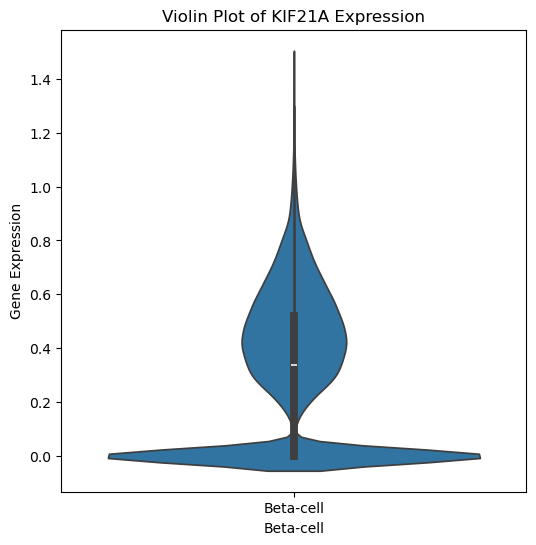

In [50]:
gene_expr = output_h5ad[:, output_h5ad.var.feature_name == 'KIF21A'].X.toarray().flatten()

df = pd.DataFrame({
    'KIF21A': gene_expr,
    'Beta-cell': ['Beta-cell'] * len(valid_expr)
})

# Create violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(x='Beta-cell', y='KIF21A', data=df)
plt.title('Violin Plot of KIF21A Expression')
plt.ylabel('Gene Expression')
plt.show()